# Simple Example

This example shows the use of the Feldman-Cousins method for a simple function with gaussian parameter shapes 

In [2]:
import fc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

## Generate Fake Data Set

First, let's create some fake data to play with. Pay attention to the model we use, because it has to fit a certain form f(x, p1, p2). 

For this model, let's use a simple sine wave $y=Acos(\omega t)$. We will add gaussian noise to our model to represent a more realistic dataset.

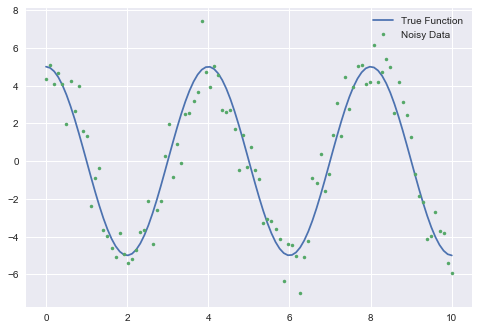

In [3]:
def model(t, A, w):
    return A * np.cos(w * t)

t = np.linspace(0, 10, 100)
true_params = (5.0, np.pi/2)
pure = model(t, *true_params)
data = pure + np.random.normal(0, 1, t.size)

#Plot
plt.plot(t, pure, label='True Function')
plt.plot(t, data, '.', label='Noisy Data')
plt.legend()

## Chi2 Fitting

The first step to using the Feldmen-Cousins method is to fit for the parameters using a chi2 fit. This requires a model, the indepedent variable, and test data along with a range for each parameter to look within. This creates a grid of each parameter pair in the parameter space and finds the chi2 value. The grid of chi2 values is then normalized by the smallest chi2 value. This resulting away is the delta-chi2 surface. By masking it at the critical values for chi2 (2.3, 6.18, 11.83) you can see the one, two, and three-sigma surfaces pertaining to the parameter intervals. 

In [4]:
res = fc.fit(model, t, data, (3, 6), (0.1, 3), grid_size=50)
ext=(0.1, 3, 3, 6)

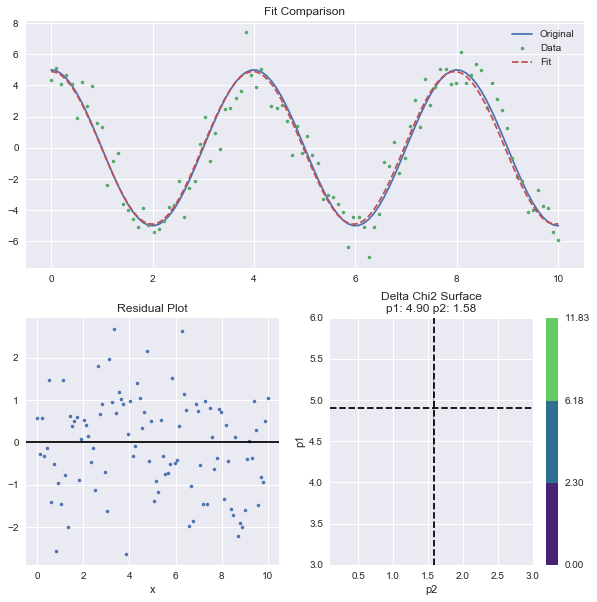

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Fit Comparison')
plt.plot(t, pure, label='Original')
plt.plot(t, data, '.', label='Data')
plt.plot(t, res.best_fit, '--', label='Fit')
plt.legend()

plt.subplot(2,2,3)
plt.title('Residual Plot')
plt.xlabel('x')
plt.plot(t, res.residuals, '.')
plt.axhline(0, color='k')

plt.subplot(2,2,4)
plt.title('Delta Chi2 Surface\np1: {:.2f} p2: {:.2f}'.format(*res.params))
plt.ylabel('p1')
plt.xlabel('p2')
cf = plt.contourf(res.dchi2_space, [0, 2.3, 6.18, 11.83], cmap='viridis', extent=ext)
plt.axhline(res.params[0], c='k', ls='--')
plt.axvline(res.params[1], c='k', ls='--')
plt.colorbar(cf)

### Parameter tuning
As you can see in the bottom-right panel, the chi2 surface is not visible. This means we should create a smaller range to zoom in on the parameters, effectively increasing our precision. This is very important for the Feldman-Cousins method up ahead.

In [6]:
p, ext = res.autoParams()

In [7]:
res = fc.fit(model, t, data, *p, grid_size=50)
# ext=(1.25, 1.75, 4.9, 5.3)

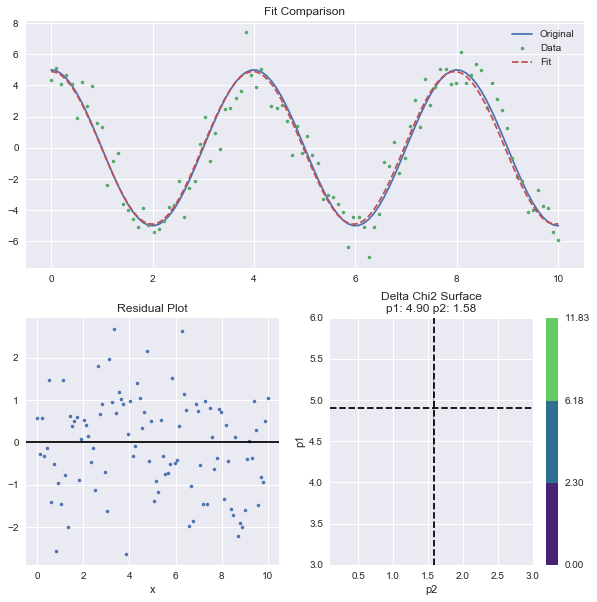

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Fit Comparison')
plt.plot(t, pure, label='Original')
plt.plot(t, data, '.', label='Data')
plt.plot(t, res.best_fit, '--', label='Fit')
plt.legend()

plt.subplot(2,2,3)
plt.title('Residual Plot')
plt.xlabel('x')
plt.plot(t, res.residuals, '.')
plt.axhline(0, color='k')

plt.subplot(2,2,4)
plt.title('Delta Chi2 Surface\np1: {:.2f} p2: {:.2f}'.format(*res.params))
plt.ylabel('p1')
plt.xlabel('p2')
cf = plt.contourf(res.dchi2_space, [0, 2.3, 6.18, 11.83], cmap='viridis', extent=ext)
plt.axhline(res.params[0], c='k', ls='--')
plt.axvline(res.params[1], c='k', ls='--')
plt.colorbar(cf)

As we can see, we should keep tuning

In [7]:
res = fc.fit(model, t, data, (4.6, 5.8), (1.53, 1.6), grid_size=50)
ext=(1.53, 1.6, 4.6, 5.8)

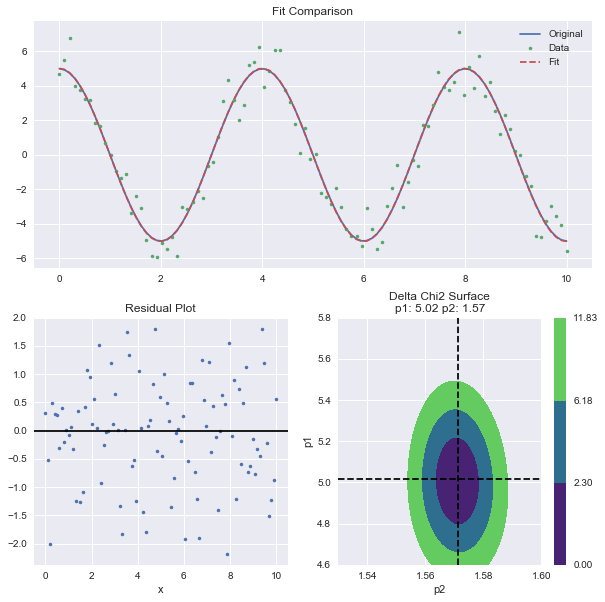

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Fit Comparison')
plt.plot(t, pure, label='Original')
plt.plot(t, data, '.', label='Data')
plt.plot(t, res.best_fit, '--', label='Fit')
plt.legend()

plt.subplot(2,2,3)
plt.title('Residual Plot')
plt.xlabel('x')
plt.plot(t, res.residuals, '.')
plt.axhline(0, color='k')

plt.subplot(2,2,4)
plt.title('Delta Chi2 Surface\np1: {:.2f} p2: {:.2f}'.format(*res.params))
plt.ylabel('p1')
plt.xlabel('p2')
cf = plt.contourf(res.dchi2_space, [0, 2.3, 6.18, 11.83], cmap='viridis', extent=ext)
plt.axhline(res.params[0], c='k', ls='--')
plt.axvline(res.params[1], c='k', ls='--')
plt.colorbar(cf)

((4.6, 5.8, 1.53, 1.6), ((1.53, 1.6), (4.6, 5.8)))


## Feldmen-Cousins Fitting
This is the process of creating synthetic data from our parameter space, fitting them and then comparing the delta-chi2 values. This is a relatively slow process, so prepare for long waits or use high-performance equipment.

There, now we can see a very well-defined delta-chi2 surface near the critical values. Note that because these shapes are ellipsis, we can take the parameters to be gaussian and have no need to perform the Feldmen-Cousins fit.

In [9]:
dchi2 = res.fc(n_exp=20, verbose=True)

Time elapsed 29.768517925925924s


### MC experiments

In this method, we use monte-carlo resampling experiments for our fits. The data structure for dchi2 here is indexed first by experiment then by the parameter space. We can take a look at a histogram for a given parameter to gain insight on our resampling

Text(0.5,1,'p1: 4.844897959183673, p2: 1.5442857142857143')

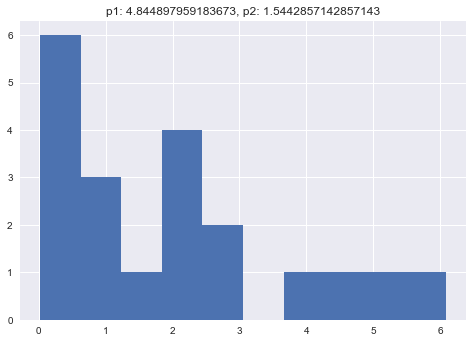

In [10]:
plt.hist(dchi2[:, 10, 10], bins=10)
plt.title('p1: {}, p2: {}'.format(res.p1_space[10], res.p2_space[10]))

### Critical Parameter Surface
For this example, we will be using a 95% confidence interval, so we get the appropriate surface and we can take a look at it. It should be mostly uniform.

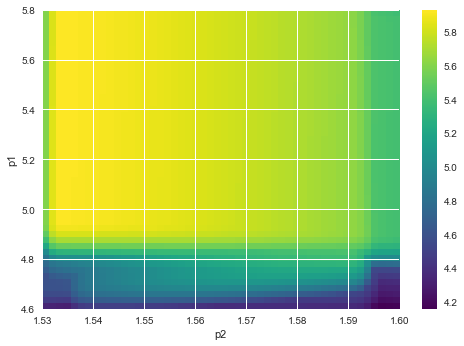

In [11]:
surf = np.percentile(dchi2, 99, axis=0)
plt.imshow(surf, cmap='viridis', extent=ext, aspect='auto')
plt.ylabel('p1')
plt.xlabel('p2')
plt.colorbar()

### Getting the Intervals
Finally, we can get our Feldmen-Cousin intervals by masking our original delta-chi2 surfaces to values less than our critical parameter surface

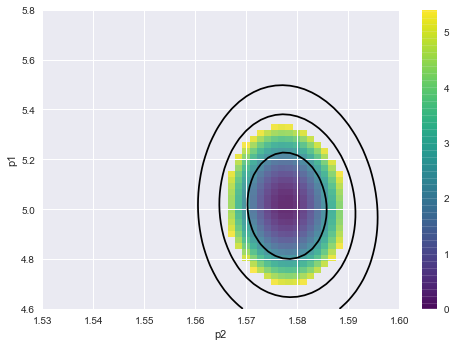

In [12]:
#mask original delta chi2 surface so that any values greater than the 95th percentile are excluded
final = res.get_surf(95)

im = plt.imshow(final, cmap='viridis', alpha=0.8, extent=ext, aspect='auto', origin='lower')
plt.contour(res.dchi2_space, [0, 2.3, 6.8, 11.83], colors='k', extent=ext)
plt.ylabel('p1')
plt.xlabel('p2')
plt.colorbar(im)

## Final Result

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Fit Comparison')
plt.plot(t, pure, label='Original')
plt.plot(t, data, '.', label='Data')
plt.plot(t, res.best_fit, '--', label='Fit')
plt.legend()

plt.subplot(2,2,3)
plt.title('Residual Plot')
plt.xlabel('x')
plt.plot(t, res.residuals, '.')
plt.axhline(0, color='k')

plt.subplot(2,2,4)
plt.title('Delta Chi2 Surface\np1: {:.2f} p2: {:.2f}'.format(*res.params))
plt.ylabel('p1')
plt.xlabel('p2')
im = plt.imshow(final, cmap='viridis', alpha=0.8, extent=ext, aspect='auto', origin='lower')
plt.contour(res.dchi2_space, [0, 2.3, 6.8, 11.83], colors='k', extent=ext)
plt.axhline(res.params[0], c='k', ls='--')
plt.axvline(res.params[1], c='k', ls='--')
plt.colorbar(cf)